In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load and preprocess the data
train_data = pd.read_csv(r'/Users/lfarias/Downloads/Kaggle-IFT3395/data/train.csv')
test_data = pd.read_csv(r'/Users/lfarias/Downloads/Kaggle-IFT3395/data/test.csv')

In [12]:
# Extract features for the training data
X_train = train_data.iloc[:, :-1].values  # Features in the training data
y_train = train_data.iloc[:, -1].values   # Labels in the training data

# Extract features for the testing data (no labels to extract)
X_test = test_data.values    # Features in the testing data

In [13]:
# Calculate class probabilities and means
class_probs = {}
class_means = {}
unique_labels = np.unique(y_train)

In [14]:
for label in unique_labels:
    label_data = X_train[y_train == label]
    class_probs[label] = len(label_data) / len(X_train)
    class_means[label] = label_data.mean(axis=0)

In [15]:
# Calculate class conditional probabilities using Gaussian PDF
class_conditional_probs = {}
for label in unique_labels:
    class_conditional_probs[label] = 1
    for feature in range(X_test.shape[1]):
        mean = class_means[label][feature]
        std = label_data[:, feature].std()
        class_conditional_probs[label] *= (1 / (np.sqrt(2 * np.pi) * std)) * \
                                         np.exp(-((X_test[:, feature] - mean) ** 2) / (2 * std ** 2))

In [16]:
# Predict labels
predicted_labels = []
for i in range(X_test.shape[0]):
    label_probs = {label: class_probs[label] * class_conditional_probs[label][i] for label in unique_labels}
    predicted_label = max(label_probs, key=label_probs.get)
    predicted_labels.append(predicted_label)

In [21]:
# Print intermediate values for debugging
print("Class Probabilities:", class_probs)
print("Class Means:", class_means)
print("Class Conditional Probabilities:", class_conditional_probs)

Class Probabilities: {0: 0.7859472743521001, 1: 0.04077301161751564, 2: 0.17327971403038428}
Class Means: {0: array([ 2.09419580e+04,  3.52194307e-01,  2.67825274e+02,  3.46270444e+01,
       -1.64843427e+00,  5.93275596e-03, -2.86162513e+00, -9.45144632e-01,
        1.46190333e-02,  1.01563385e+05,  1.01566071e+05,  2.16847614e+02,
        2.64564604e+02,  3.76258564e-08,  2.98766745e+02,  2.97284192e+02,
        1.35824807e+02,  1.23007254e+04,  6.54725716e+01,  2.00185448e+07]), 1: array([ 2.53147304e+04,  1.66020753e+01,  2.57650342e+02,  5.28834353e+01,
       -1.02042799e+00,  2.01965898e+00, -8.36697389e-02,  7.22683439e-01,
        1.86470194e-02,  1.00696231e+05,  1.00698073e+05,  2.19222039e+02,
        2.67780020e+02,  2.13048627e-07,  3.01286273e+02,  3.00310328e+02,
        7.85775925e+01,  1.24024712e+04,  6.63000082e+01,  2.00255644e+07]), 2: array([ 2.82148860e+04, -2.24332661e+01,  2.78561799e+02,  3.03020554e+01,
        4.19766588e+00, -6.01809694e-01,  6.56169394e-0

In [22]:
# Output results with 'SNo' and 'Label' columns
results = pd.DataFrame({'SNo': test_data['SNo'], 'Label': predicted_labels})
results.to_csv('submission.csv', index=False)

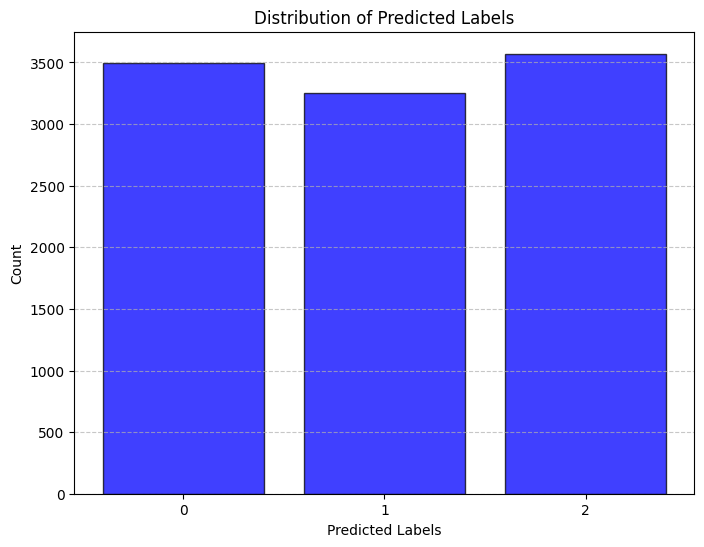

In [24]:
# Plot the distribution of predicted labels
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(predicted_labels, bins=np.arange(4) - 0.5, rwidth=0.8, alpha=0.75, color='blue', edgecolor='black')
plt.xticks(range(3))
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()